# Contexto del proyecto

Es sabido que las enfermedades cardiovasculares son la que, probablemente, más muertes causan en todo el mundo. Se estima que aproximadamente un 30% de las muertes son a causa de este tipo de enfermedades, y por lo general sucede en personas menores de 70 años.

En este dataset, contaremos 11 variables que serán de utilidad para poder predecir si la persona posiblemente tiene o no una enfermedad cardiovascular.

Las variables son la siguentes:

* Age: edad del paciente [años]
* Sex: sexo del paciente [M: Masculino, F: Femenino]
* ChestPainType: tipo de dolor de pecho [TA: Angina Típica, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomática]
* RestingBP: presión arterial en reposo [mm Hg]
* Cholesterol: colesterol sérico [mm/dl]
*FastingBS: glucemia en ayunas [1: if FastingBS > 120 mg/dl, 0: caso contrario]
*RestingECG: resultados de electrocardiograma en reposo [Normal: Normal, ST: con anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), LVH: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
* MaxHR: frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
*ExerciseAngina: angina inducida por ejercicio [Y: Si, N: No]
*Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
* ST_Slope: la pendiente del segmento ST de ejercicio máximo [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente]
* HeartDisease: clase de salida [1: cardiopatía , 0: Normal]

El principal motivo de este proyecto es poder brindar el análisis realizado a profesionales de la salud, para que éstos puedan utilizarlo como una herramienta y ser asistidos a la hora de tomar una decisión. De modo que a partir del trabajo propuesta, sea más sencilla la tardea de diagnosticar a un paciente.

## Preguntas de interés

* ¿Qué relación hay entre la edad de los pacientes y una cardiopatía diagnosticada?
* ¿Es más habitual una cardiopatía en hombres o en mujeres?
* Tanto en hombres como mujeres, ¿predomina algún tipo de dolor de pecho sobre el resto? ¿si hay cardiopatía diagnosticada, algún tipo de dolor es mas común?
* ¿Existe una relación entre una cardiopatía y los valores de glucemia?
* ¿Que características del electrocardiograma están  mas asociadas a una cardiopatía?

# Importación de librerías necesarias para el proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import probplot
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV

# Información del dataset

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_original.csv')
df.head()

Mounted at /content/drive/


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Tamaño del dataset
print('El dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

El dataset tiene 1268 filas, y 12 columnas


In [ ]:
# Verifica si hay filas duplicadas en el dataset
duplicados = df.duplicated()

# Imprime la cantidad de filas duplicadas
print("Cantidad de filas duplicadas:", duplicados.sum())

Cantidad de filas duplicadas: 0


In [ ]:
# Veamos un poco más de información
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1268.0,53.282334,11.397009,25.0,46.0,54.0,61.0,79.0
RestingBP,1268.0,132.108833,18.009490,0.0,120.0,130.0,140.0,200.0
Cholesterol,1268.0,212.899842,105.758904,0.0,175.0,227.5,277.0,603.0
FastingBS,1268.0,0.235804,0.424668,0.0,0.0,0.0,0.0,1.0
MaxHR,1268.0,137.620662,25.372156,60.0,120.0,140.0,157.0,202.0
Oldpeak,1268.0,0.882571,1.069534,-2.6,0.0,0.5,1.5,6.2
HeartDisease,1268.0,0.541009,0.498512,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Busquemos valores nulos en las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1268 non-null   int64  
 1   Sex             1268 non-null   object 
 2   ChestPainType   1268 non-null   object 
 3   RestingBP       1268 non-null   int64  
 4   Cholesterol     1268 non-null   int64  
 5   FastingBS       1268 non-null   int64  
 6   RestingECG      1268 non-null   object 
 7   MaxHR           1268 non-null   int64  
 8   ExerciseAngina  1268 non-null   object 
 9   Oldpeak         1268 non-null   float64
 10  ST_Slope        1268 non-null   object 
 11  HeartDisease    1268 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 119.0+ KB


El dataset no posee valores nulos.

In [ ]:
# veamos que cantidad de personas de cada sexo hay registradas
df['Sex'].value_counts()

M    890
F    378
Name: Sex, dtype: int64

In [ ]:
# veamos cuantos casos positivos (1) y negativos (0) hay registrados
df['HeartDisease'].value_counts()

1    686
0    582
Name: HeartDisease, dtype: int64

Uno de los fines de este proyecto será poder predecir si la persona tiene o tendrá una enfermedad del corazón. En este caso la variable que queremos predecir es ``HeartDisease``.
A fines prácticas y para evitar confusiones, cambiaremos el nombre de la variable a ``Outcome``.

In [ ]:
df.HeartDisease = df.rename({'HeartDisease':'Outcome'},inplace = True,axis =1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Wrangling y Exploratory Data Analysis.

En la etapa de Data Wrangling, justamente, haremos la preparación de los datos. En este proceso se hara una limpieza, transformación y preparación de los datos para un futuro análisis. Esto incluye: eliminación de datos duplicados, transformación del tipo de dato a uno adecuado si así se requiere, detección y eleminación de valor atípicos (outliers), y otros procesos.

La etapa de EDA, abarca la exploración y la comprensión de los datos para obtener información. Esto incluye la visualización de datos utilizando gráficos y tablas para identificar patrones, tendencias, valores atípicos y relaciones entre variables. El objetivo del EDA es obtener una comprensión profunda de los datos antes de realizar el análisis estadístico o modelización.

## DW (Data Wrangling)

El proceso de Data Wrangling estará compuesto, en aspectos generales, a la limpieza y preparación de datos. Es decir: detección y eleminación de valores atípicos, eliminación de valores duplicados, transformar los tipos de datos a uno adecuado, normalización de variables, etc.

Dejemos el df con el dataset original, y hagamos una copia del df en el cual haremos dichos procesos.

In [ ]:
df_copy = df.copy(deep = True)

### Distribución de las variables y eliminación de outiliers

Parece ser que la variable Cholesterol contiene muchos registros nulos, vemos que porcentaje abarcan, de modo de saber cómo tratar estos valores.

In [ ]:
df_copy.Cholesterol.value_counts(dropna=False)

0      172
211     12
220     12
254     11
263     11
      ... 
321      1
529      1
409      1
156      1
372      1
Name: Cholesterol, Length: 286, dtype: int64

Es decir que de los 1268 registros, 172 son nulos, es decir: aproximadamente 13,56% de los registros son nulos.

A fin de mantener un dataset con suficientes registros, no los eliminaremos.

Para la eliminación de valores atípicos, previamente tenemos que analizar la distribución de los datos, por ejemplo haciendo uso de tests estadísticos (como podría ser el de Shapiro-Wilk). Según si la distribución sea normal o no usaremos distintos métodos para eliminar los outliers.

En caso que sea normal usaremos **z-scores**. Si no es normal **IQR (rango intercuartil)**.

In [ ]:
# Creemos una función para aplicar el test de Shapiro-Wilk, con la librería scipy
#si el resultado del test es mayor a 0.5 no se puede rechazar la hipotesis nula (la distribución es normal)
#en caso contrario, se rechaza la hipótesis (no sigue distribución normal)
def shapiro_wilk_test(data, alpha=0.5):
    stat, p = shapiro(data)
    if p > alpha:
        print('No se puede rechazar la hipótesis nula (los datos siguen una distribución normal)')
    else:
        print('Se rechaza la hipótesis nula (los datos no siguen una distribución normal)')

#### Age

In [ ]:
shapiro_wilk_test(df_copy['Age'],alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


Como la distribución no es normal, debemos usar el test de IQR.

In [ ]:
Q1 = df_copy['Age'].quantile(.25)
Q3 = df_copy['Age'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(23.5, 83.5)

In [ ]:
df_copy['Age'].min()

25

In [ ]:
df_copy = df_copy[(df['Age'] >= df_copy['Age'].min()) & (df_copy['Age'] < limitesup)] #usamos el min() porque el limite inferior es menor que el minimo

In [ ]:
df_copy.shape

(1268, 12)

No se han encontrado, y por lo tanto eliminado, valores atípicos.

#### RestingBP

In [ ]:
shapiro_wilk_test(df_copy['RestingBP'], alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [ ]:
Q1 = df_copy['RestingBP'].quantile(.25)
Q3 = df_copy['RestingBP'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(90.0, 170.0)

In [ ]:
df_copy['RestingBP'].min()

0

In [ ]:
df_copy = df_copy[(df['RestingBP'] >= limiteinf) & (df_copy['RestingBP'] < limitesup)]

In [ ]:
df_copy.shape

(1217, 12)

En esta ocasión se han elimiando aproximadamente 50 registros.

#### Cholesterol

In [ ]:
shapiro_wilk_test(df_copy['Cholesterol'], alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [ ]:
Q1 = df_copy['Cholesterol'].quantile(.25)
Q3 = df_copy['Cholesterol'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(23.5, 427.5)

In [ ]:
df_copy['Cholesterol'].min()

0

In [ ]:
df_copy = df_copy[(df['Cholesterol'] >= df_copy['Cholesterol'].min()) & (df_copy['Cholesterol'] < limitesup)]

<ipython-input-128-31ee1dd9187d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df['Cholesterol'] >= df_copy['Cholesterol'].min()) & (df_copy['Cholesterol'] < limitesup)]


In [ ]:
df_copy.shape

(1209, 12)

Se eliminaron 8 valores atípicos.

#### MaxHR

In [ ]:
shapiro_wilk_test(df['MaxHR'],alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


Corresponde usar el método IQR.

In [ ]:
Q1 = df_copy['MaxHR'].quantile(.25)
Q3 = df_copy['MaxHR'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(63.0, 215.0)

In [ ]:
df_copy['MaxHR'].min()

60

In [ ]:
df_copy = df_copy[(df['MaxHR'] >= limiteinf) & (df_copy['MaxHR'] < limitesup)]

<ipython-input-133-8b44d524cda8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df['MaxHR'] >= limiteinf) & (df_copy['MaxHR'] < limitesup)]


In [ ]:
df_copy.shape

(1208, 12)

Se eliminó 1 registro.

## EDA (Análisis exploratorio de datos)

In [ ]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


* Lo que haremos en esta primera etapa, será realizar visualizaciones de las variables que disponemos a fin de obtener infomración de las mismas.
De manera general, generaremos visualizaciones de cada variable en relación a las variables ``Sex``, ``Age`` y ``Outcome``, para entender justamente como se comportan segun los sexos, rango etario, y para que valores fue más frecuente un diagnóstico de cardiopatía.

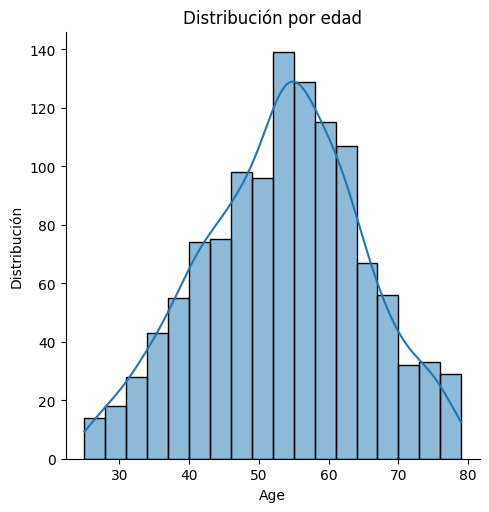

In [ ]:
# Veamos en que rango de edades se encuentras las personas
sns.displot(x=df_copy['Age'], kde=True).set(ylabel= 'Distribución',title='Distribución por edad')

[Text(0.5, 1.0, 'Age vs Target')]

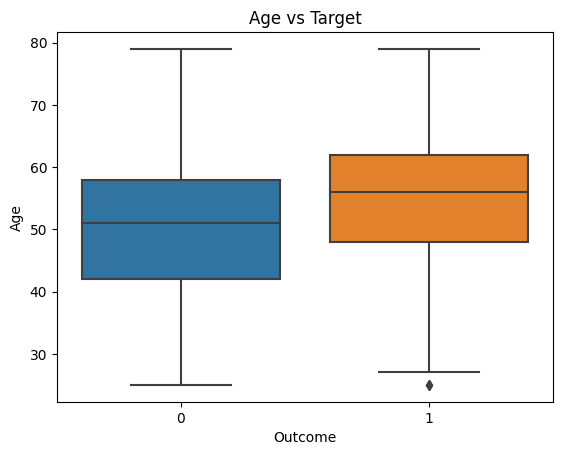

In [ ]:
sns.boxplot(x =df_copy["Outcome"], y = df_copy["Age"]).set(title='Age vs Target')

[Text(0, 0.5, 'Sexo'), Text(0.5, 1.0, 'Edad según sexo')]

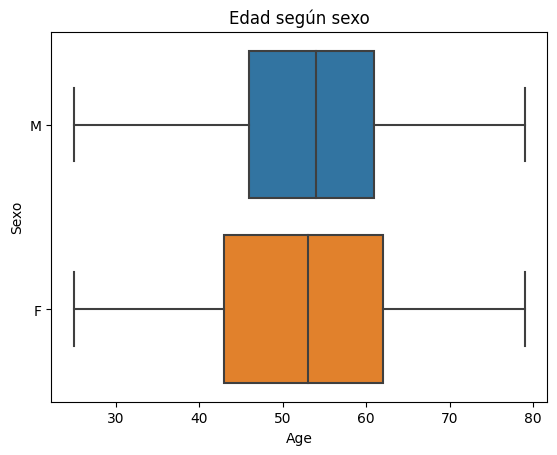

In [ ]:
sns.boxplot(x =df_copy["Age"], y = df_copy["Sex"]).set(ylabel= 'Sexo', title='Edad según sexo')

La distribución parece ser aproximadamente normal. En el boxplot podemos ver que las "cajas" abarcan casi el mismo rango de edades, con la diferencia que el de las mujeres comienza a una edad más temprana.

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'Sex vs. Target')]

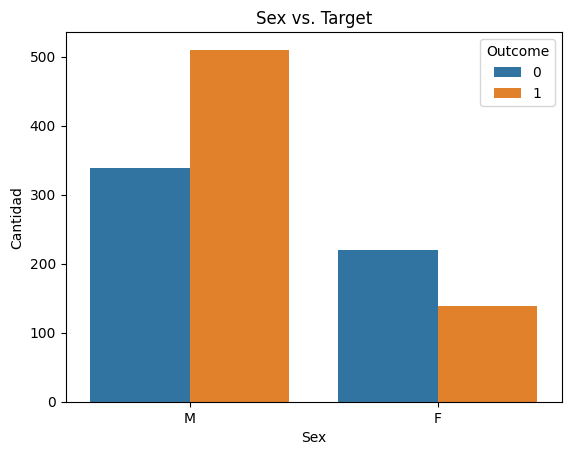

In [ ]:
sns.countplot(x=df_copy['Sex'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='Sex vs. Target')

[Text(0, 0.5, 'Sexo'), Text(0.5, 1.0, 'Colesterol según sexo')]

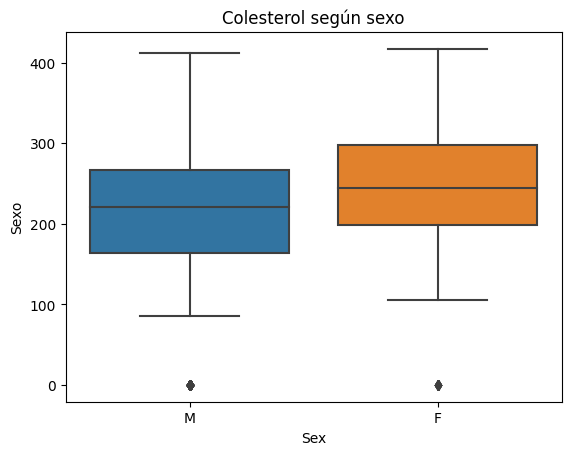

In [ ]:
sns.boxplot(y =df_copy["Cholesterol"], x = df_copy["Sex"]).set(ylabel= 'Sexo', title='Colesterol según sexo')

In [ ]:
df_copy['Cholesterol'].quantile(0.25)

174.0

In [ ]:
df_copy['Cholesterol'].quantile(0.75)

275.0

[Text(0.5, 1.0, 'Cholesterol vs Target')]

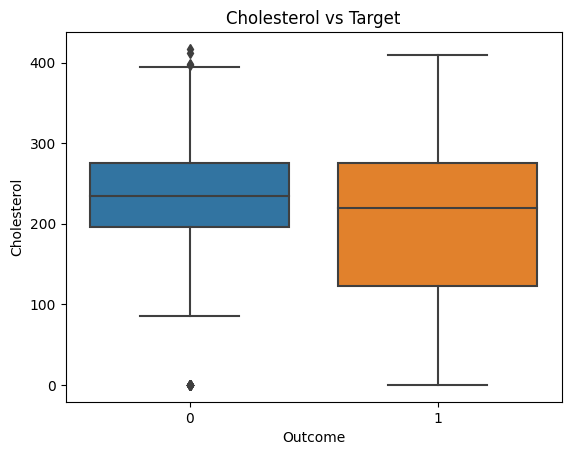

In [ ]:
sns.boxplot(x=df_copy['Outcome'], y=df_copy['Cholesterol']).set(title= "Cholesterol vs Target")

Aquí podemos ver que para los hombres, la caja del boxplot (entre el 25% y 75% de los datos) se ubican entre aproximadamente los valores de 174 y 275. Podemos ver una cantidad notable de valores atípicos, excediendo los 400 y llegando hasta 600.

En cambio en las mujeres tiene una distribución mas "pareja", entran mas valores dentro de la caja, y los bigotes del boxplot van hasta mas de 450. Detectando pocos outliers.

Es decir, comunmente las mujeres alcanzan valores más altos de colesterol, pero se han registrado valores mas altos para hombres.

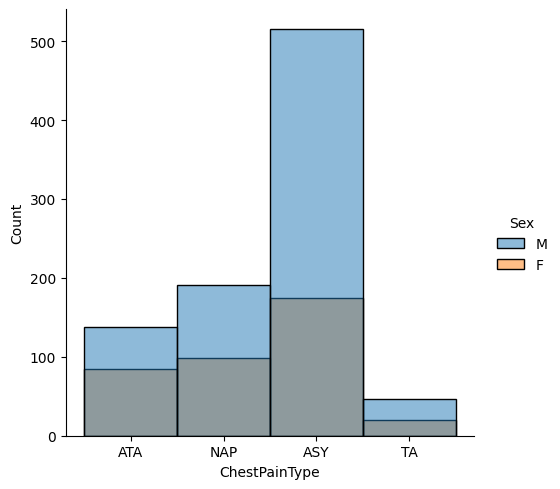

In [ ]:
# Veamos como es la distribución por sexo para los distintos dolores de pecho. Luego veremos la distribución por sexo en caso que tengan o no angina por ejercicio.

sns.displot(df_copy, x=df['ChestPainType'], hue = df['Sex'])

El patrón es similar para ambos sexos.

Se puede destacar que en el caso que no hay síntomas de dolor de pecho, se han registrado muchos más casos. En los 3 casos restantes de tipos de dolor, la distribución es pareja para cada uno de los casos.

[Text(0.5, 0, 'Tipo de dolor de pecho'),
 Text(0.5, 1.0, 'Distribución de MaxHR por tipo de dolor')]

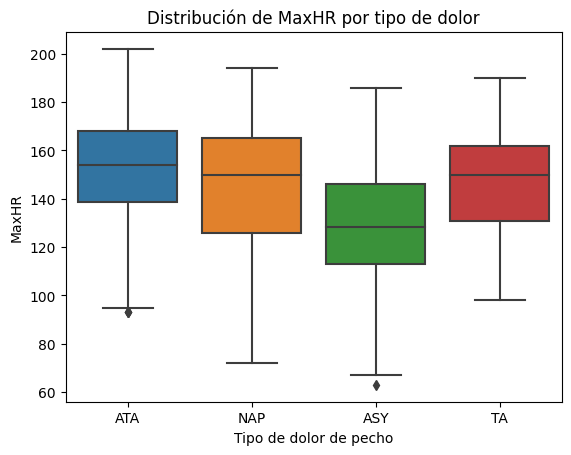

In [ ]:
# veamos si hay algun tipo de relacion entre el dolor de pecho y la frecuencia maxima
sns.boxplot(data=df_copy, x=df_copy['ChestPainType'], y=df_copy['MaxHR']).set(xlabel='Tipo de dolor de pecho', title='Distribución de MaxHR por tipo de dolor')

Los de menor frecuencia máxima son los de tipo asintomático.
Para los otros tres tipos de dolor (típica, atípica y no anginoso), presetan una media similar, siendo el caso "típico" en que se encuentra la caja con valores mas altos (entre Q1 y Q3), y para el casó atípico se registran los valores más altos.


[Text(0.5, 1.0, 'Distribución de "Dolor de pecho" vs "Target'),
 Text(0.5, 0, 'Dolor de pecho'),
 Text(0, 0.5, 'Cantidad')]

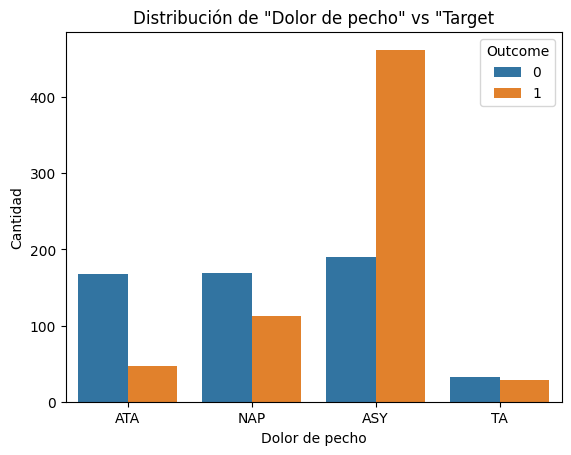

In [ ]:
# Veamos si las personas que tienen dolor de pecho, registraban 0 o 1 en la variable target

sns.countplot(data=df_copy, x =df_copy['ChestPainType'], hue = df_copy['Outcome']).set(title='Distribución de "Dolor de pecho" vs "Target', xlabel = 'Dolor de pecho', ylabel='Cantidad')

([<matplotlib.axis.XTick at 0x7a7da9344100>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

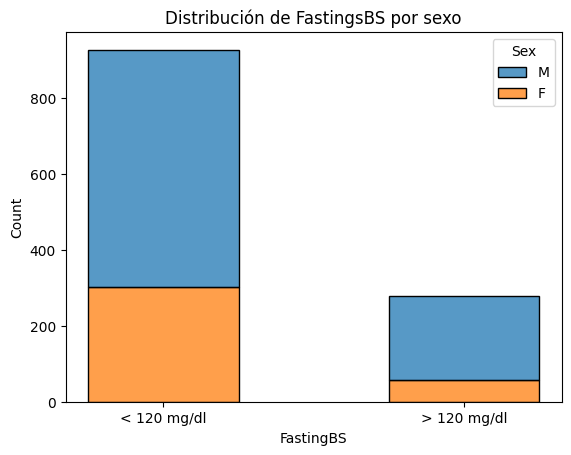

In [ ]:
# Análisis para FastingsBS. Veamos como se distribuye por sexo, por edad y su relación con la variable target
labels=['< 120 mg/dl', '> 120 mg/dl']
sns.histplot(x=df_copy['FastingBS'], hue=df_copy['Sex'], multiple='stack', discrete = True, shrink = 0.5).set(title='Distribución de FastingsBS por sexo')
plt.xticks([0,1],labels)


([<matplotlib.axis.XTick at 0x7a7da8f8d480>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

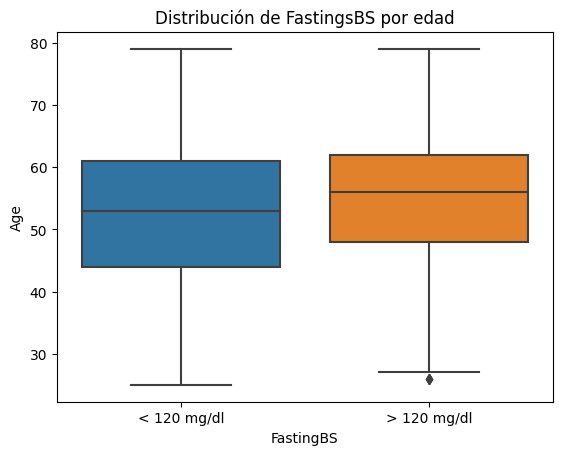

In [ ]:
labels=['< 120 mg/dl', '> 120 mg/dl']
sns.boxplot(x=df_copy['FastingBS'], y=df_copy['Age']).set(title='Distribución de FastingsBS por edad')
plt.xticks([0,1],labels)

([<matplotlib.axis.XTick at 0x7a7da9009b70>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

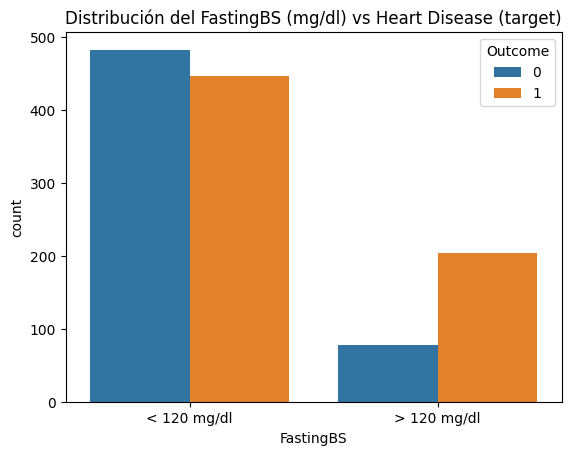

In [ ]:
sns.countplot(x =df_copy['FastingBS'], hue = df_copy['Outcome']).set(title='Distribución del FastingBS (mg/dl) vs Heart Disease (target)')
plt.xticks([0, 1],labels)

La acumulación para casos donde FastingsBS < 120 mg/dl es prácticamente igual si había o no cardiopatía. En cambio, si FastingsBS > 120 mg/dl la cantidad de casos en los que si había cardiopatía supera en casi el doble a los casos negativos.

[Text(0.5, 1.0, '"RestingECG" vs "Sexo'),
 Text(0.5, 0, 'Electrocardiograma en reposo'),
 Text(0, 0.5, 'Cantidad')]

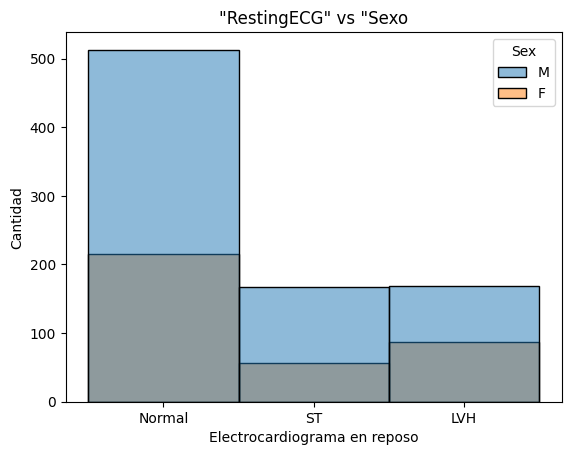

In [ ]:
# Comportamiento del electrocardiograma segun el sexo
sns.histplot(x =df_copy['RestingECG'], hue = df_copy['Sex']).set(title='"RestingECG" vs "Sexo', xlabel = 'Electrocardiograma en reposo', ylabel='Cantidad')

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'RestingECG vs. Target')]

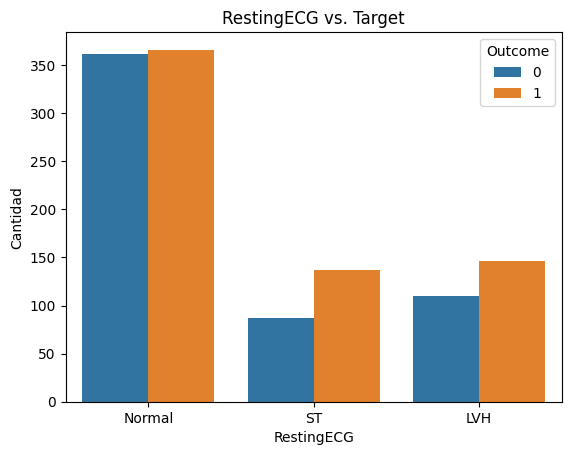

In [ ]:
sns.countplot(x=df_copy['RestingECG'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='RestingECG vs. Target')

[Text(0.5, 1.0, 'MaxHR según sexo')]

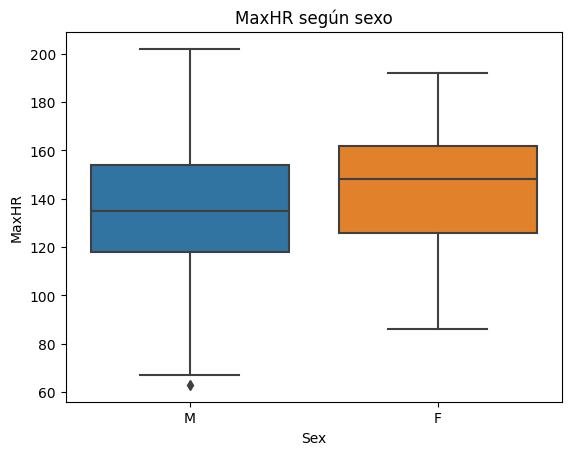

In [ ]:
# MaxHR por sexo
sns.boxplot(x=df_copy['Sex'], y=df_copy['MaxHR']).set(title= "MaxHR según sexo")

Tienen para ambos sexos una distribución similar, siendo el rango intercuartil de las mujeres apenas más elevado.

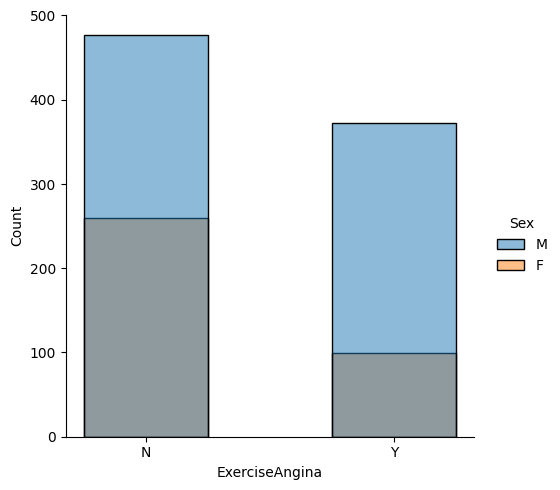

In [ ]:
#Angina inducida por ejercicio segun el sexo
sns.displot(df, x=df_copy['ExerciseAngina'], hue = df_copy['Sex'], shrink= 0.5)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

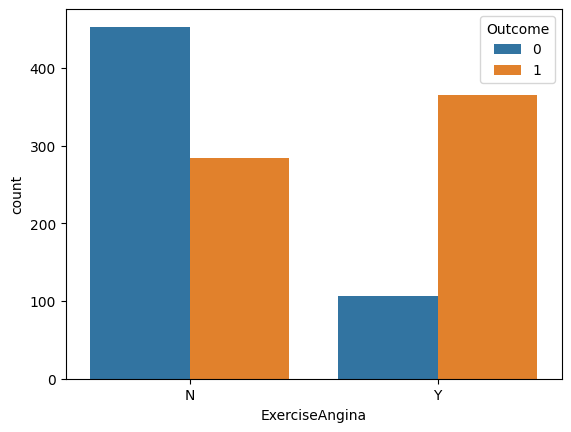

In [ ]:
sns.countplot(x=df_copy['ExerciseAngina'], hue = df_copy['Outcome'])

Es evidente que en los casos que si hubo angina inducida por ejercicio, la cantidad de casos en la que se registra una cardiopatía es aproximadamente el doble a los casos que no.

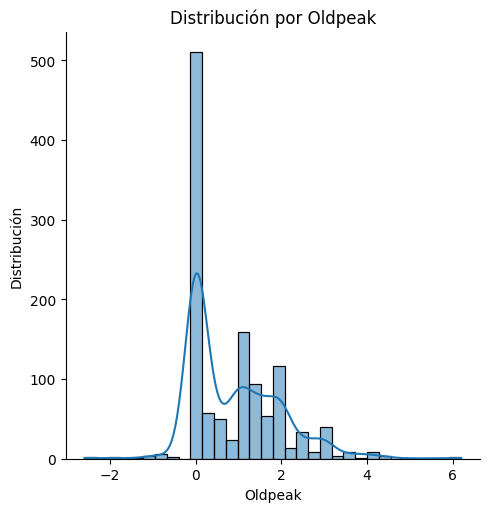

In [ ]:
# Veamos la distribución de la variable Oldpeak
sns.displot(data=df_copy, x='Oldpeak', kde=True).set(ylabel= 'Distribución',title='Distribución por Oldpeak')

<Axes: xlabel='ST_Slope', ylabel='Count'>

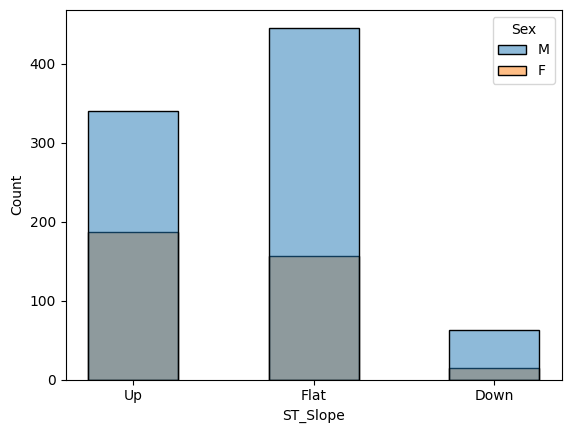

In [ ]:
# Veamos la distribución de Slope por sexo
sns.histplot(x=df_copy['ST_Slope'], hue=df_copy['Sex'], shrink = 0.5)

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'Distribución ST_Slope vs. Target')]

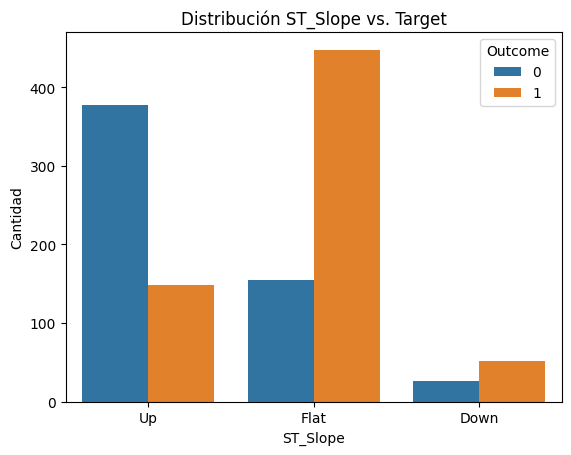

In [ ]:
# Relación entre ST_Slope y cardiopatía
sns.countplot(x=df_copy['ST_Slope'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='Distribución ST_Slope vs. Target')

Se registraron muchos más diagnósticos de cardiopatía en los casos en que Slope es Flat.

## Respondiendo las preguntas planteadas

En base a los insights que obtuvimos con las visualizaciones, responderemos las preguntas planteadas:

* ¿Qué relación hay entre la edad de los pacientes y una cardiopatía diagnosticada?

A partir de los gráficos de caja, podemos ver que el promedio de edad de personas con cardiopatías es algo mayor que las que no tienen. Siendo para los casos negativos una media de casi 50 años, y para los positivos casi 60.
Con esto podemos intuir que a mayor edad, más probable es que padezca una enfermedad del corazón.

* ¿Es más habitual una cardiopatía en hombres o en mujeres?

Según el countplot que hemos realizado, para los hombres es significativamente mayor la cantidad con cardiopatías. En la cambio para mujeres, la distribución es casi la misma, pero siendo la mayor la de casos positivos.

* Tanto en hombres como mujeres, ¿predomina algún tipo de dolor de pecho sobre el resto? ¿si hay cardiopatía diagnosticada, algún tipo de dolor es mas común?

El tipo "asintomático" destaca notablemente sobre el resto. Además, el tipo "asintomático" es el único que presenta más casos positivos de que negativos.
Esto podría ser confuso, ya que particularmente el caso que más positivos presenta es el asintomático.

* ¿Existe una relación entre una cardiopatía y los valores de glucemia?

Para los pacientes que tuvieron como resultado 120 mg/dl la distribución fue casi la misma (y son la mayoría de los casos). Pero cuando el valor fue mayor a 120 mg/dl los casos positivos fueron casi el doble que los negativos.

* ¿Que características del electrocardiograma están  mas asociadas a una cardiopatía?

Para los tres casos de ECG la distribución es similar, pero en el caso de "Normal" se presentan más casos positivos.

# Algoritmos de clasificación.

In [ ]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


El dataset se encuentra en "crudo", por lo que antes de poder aplicar los algoritmos de clasificación tenemos que poner a punto los datos. Sino, obtendremos resultados que no son correctos.

Para esto, tenemos que normalizar las variables. Como hicimos anteriormente, nos valdremos de dos métodos para esto: MinMaxScaler y StandardScaler.
Recordemos que en caso de que la distribución no sea normal, tendremos que aplicar MinMaxScaler, sino lo mejor sería usar StandardScaler.

Además, también tenemos que convertir las variables categóricas a numéricas haciando uso de algún encoder. (en este caso, será para: ``Sex``,  ``ChestPainType``, ``RestingECG``, ``ExerciseAngina`` y ``St_Slope``. Para ``Outcome`` lo hicimos previamente.

In [ ]:
le = LabelEncoder()
df_le = df_copy.copy(deep = True)

df_le['Sex'] = le.fit_transform(df_le['Sex'])
df_le['ChestPainType'] = le.fit_transform(df_le['ChestPainType'])
df_le['RestingECG'] = le.fit_transform(df_le['RestingECG'])
df_le['ExerciseAngina'] = le.fit_transform(df_le['ExerciseAngina'])
df_le['ST_Slope'] = le.fit_transform(df_le['ST_Slope'])

## Normalización de los datos

Ya habpiamos visto anteriormente, utilizando la prueba de Shapiro-Wilk cuáles variables seguían una distribución normal.

En base a los resultados que arrojó el test para las variables Age, Oldpeak, RestingBP, Cholesterol y MaxHR ningun seguía una distribución normal. Por lo que las normalizaremos utilizando MinMaxScaler.

In [ ]:
mms = MinMaxScaler()

df_le['Age'] = mms.fit_transform(df_le[['Age']])
df_le['RestingBP'] = mms.fit_transform(df_le[['RestingBP']])
df_le['Cholesterol'] = mms.fit_transform(df_le[['Cholesterol']])
df_le['MaxHR'] = mms.fit_transform(df_le[['MaxHR']])
df_le['Oldpeak'] = mms.fit_transform(df_le[['Oldpeak']])
df_le.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,0.277778,1,1,0.657534,0.693046,0,1,0.784173,0,0.295455,2,0
1,0.444444,0,2,0.931507,0.431655,0,1,0.669065,0,0.409091,1,1
2,0.222222,1,1,0.520548,0.678657,0,2,0.251799,0,0.295455,2,0
3,0.425926,0,0,0.630137,0.513189,0,1,0.323741,1,0.465909,1,1
4,0.537037,1,2,0.794521,0.467626,0,1,0.424460,0,0.295455,2,0


Veamos la correlación entre las variables, prestando particular atención en la correlación con Outcome.

<Axes: >

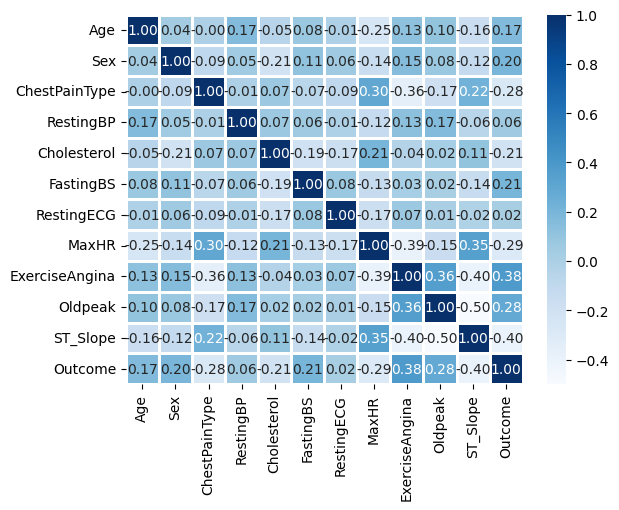

In [ ]:
sns.heatmap(df_le.corr(),fmt = ".2f",annot=True,lw=1,cmap = 'Blues')

In [ ]:
#Divido los datos en Train y Test

X = df_le.drop(columns = 'Outcome') # Train
y = df_le['Outcome']

In [ ]:
# Tomamos de anera aleatoria el 70% de los registros para Train y el 30% restante como Test.
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

Observaciones: será útil recordar más tarde que el 30% de los registros son 363 registros.
Además es conveniente saber si las categorías de Target aparecen en cantidades similares (esto será crucial para enteder el resultado del accuracy o recall más adelante).


In [ ]:
df_le['Outcome'].value_counts()

1    649
0    559
Name: Outcome, dtype: int64

## Modelo: SVM (Support Vector Machine)

In [ ]:
# Creamos el modelo SVM y entrenamos los datos

svc = SVC(C = 100, kernel = 'linear', random_state=42)
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear', random_state=42)

In [ ]:
# Ahora hacemos las predicciones

y_test_pred_svm = svc.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

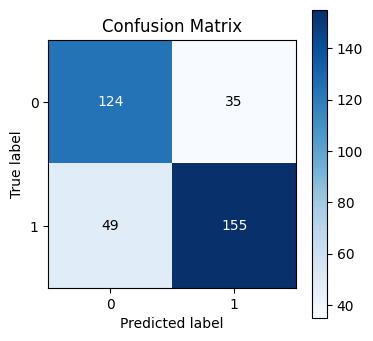

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_svm,figsize=(4,4))

In [ ]:
# Print classification report for SVM
print("Classification report for SVM:\n", classification_report(y_test, y_test_pred_svm))

Classification report for SVM:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       159
           1       0.82      0.76      0.79       204

    accuracy                           0.77       363
   macro avg       0.77      0.77      0.77       363
weighted avg       0.77      0.77      0.77       363



En la matriz de confusión vemos que de los 363 registros a predecir, 124 fueron predichos correctamente como verdaderos (True Positive), y 155 correctamente como negativos (True Negative). El resto de los registros fueron mal predichos como Falso positivo (Error tipo 1) o Falso negativo (Error tipo 2).

A partir de los datos que arroja la matriz de confusión se pueden calcular distintas métricas que dan información acerca del desempeño del modelo.

* Accuray (exactitud): indica la proporción de predicciones correctas. Como el resultado es 0.77, significa que el modelo predijo correctamente el 77% de los registros aproximadamente.

* Para la etiqueta Outcome = 0:
  * Precision_0 = 0.72. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 72% de las veces

  * Recall_0 = 0.78. El algoritmo predijo correctamente que Outcome=0 el 66% de las veces.

* Para la etiqueta Outcome = 1:
  * Precision_0 = 0.82. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 82% de las veces

  * Recall_0 = 0.76. El algoritmo predijo correctamente que Outcome=0 el 76% de las veces.

## Modelo: Árbol de decisión

In [ ]:
# Creamos el modelo de Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state = 42)

# Entrenamos los datos
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Hacemos la predicción
y_test_pred_dt = dt.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

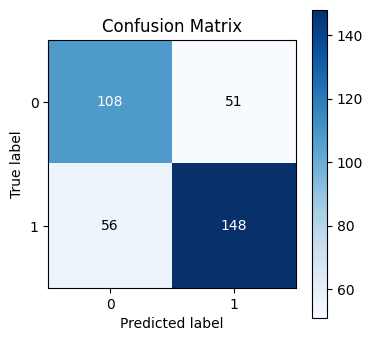

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_dt,figsize=(4,4))

In [ ]:
# Classification report para árbol de decisión
print("Classification report for Decision Tree:\n", classification_report(y_test, y_test_pred_dt))

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       159
           1       0.74      0.73      0.73       204

    accuracy                           0.71       363
   macro avg       0.70      0.70      0.70       363
weighted avg       0.71      0.71      0.71       363



En la matriz de confusión vemos que de los 363 registros a predecir, 108 fueron predicho correctamente como verdaderos (True Positive), y 148 correctamente como negativos (True Negative). El resto de los registros fueron mal predichos como Falso positivo (Error tipo 1) o Falso negativo (Error tipo 2).

A partir de los datos que arroja la matriz de confusión se pueden calcular distintas métricas que dan información acerca del desempeño del modelo.

* Accuray (exactitud): indica la proporción de predicciones correctas. Como el resultado es 0.71, significa que el modelo predijo correctamente el 71% de los registros aproximadamente.

* Para la etiqueta Outcome = 0:
  * Precision_0 = 0.66. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 66% de las veces

  * Recall_0 = 0.68. El algoritmo predijo correctamente que Outcome=0 el 68% de las veces.

* Para la etiqueta Outcome = 1:
  * Precision_0 = 0.74. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 74% de las veces

  * Recall_0 = 0.73. El algoritmo predijo correctamente que Outcome=0 el 73% de las veces.

## Modelo: Logistic Regression

In [ ]:
# Creamos el modelo
lr = LogisticRegression(max_iter=1000)

#Entrenamos los datos
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
# Hacemos las predicciones
y_test_pred_lr = lr.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

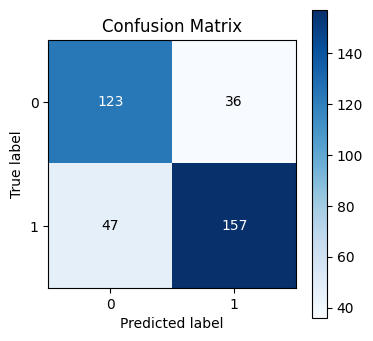

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_lr,figsize=(4,4))

In [ ]:
# Classification report para Regresión Logística
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       159
           1       0.81      0.77      0.79       204

    accuracy                           0.77       363
   macro avg       0.77      0.77      0.77       363
weighted avg       0.77      0.77      0.77       363



En la matriz de confusión vemos que de los 363 registros a predecir, 123 fueron predichos correctamente como verdaderos (True Positive), y 157 correctamente como negativos (True Negative). El resto de los registros fueron mal predichos como Falso positivo (Error tipo 1) o Falso negativo (Error tipo 2).

A partir de los datos que arroja la matriz de confusión se pueden calcular distintas métricas que dan información acerca del desempeño del modelo.

* Accuray (exactitud): indica la proporción de predicciones correctas. Como el resultado es 0.77, significa que el modelo predijo correctamente el 7% de los registros aproximadamente.

* Para la etiqueta Outcome = 0:
  * Precision_0 = 0.72. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 72% de las veces

  * Recall_0 = 0.77. El algoritmo predijo correctamente que Outcome=0 el 77% de las veces.

* Para la etiqueta Outcome = 1:
  * Precision_0 = 0.81. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 81% de las veces

  * Recall_0 = 0.77. El algoritmo predijo correctamente que Outcome=0 el 77% de las veces.

## Conclusiones sobre los modelos aplicados

Como vimos previamente, la variable Outcome que queremos predecir tiene dos categorías: 0 y 1, que resprentan si hay o no cardiopatía.
De los 575 registros que han sido seleccionados de manera aleatoria para la parte de Test de los datos, las categorías 0 y 1 están distribuídas equitativamente. Por lo que la métrica Accuracy (exactitud) puede ser tenida en cuenta.

Los modelos SVM y Logistic Regression tuvieron una exactitud del 68%, mientras que Decision Tree tuvo una exactitud de 66%. Esto parece indicar que los dos primeros modelos fueron más eficientes para predecir correctamente los registros.

De estos dos modelos con mayor exactitud, el SVM tuvo levemente una mayor Precision (proporción de la veces que predijo un cierto resultado, predijo correctamente el valor real) para la etiqueta 0 (68%) que para 1 (67%).
Para el modelo Logistic Regression fue al revés. La Precisión para 0 fue de 67% y para el 1 fue de 68%.

En tanto al Recall (proporción de veces que predijo correctamente un resultado), en el modelo SVM fue 66% para la etiqueta 0 y, fue el 69% de las veces para la etiqueta 1.
En tanto Logistic Regression fue 62% para 0 y del 73% para 1.


Dados estos resultados, personalmente considero que si tuviera que elegir un solo modelo me quedaría con SVM ya que (al igual que Logistic Regression) tuvo la mayor exactitud y un precision prácticamente igual a la del modelo LR, pero tuvo una sensibilidad (recall) más equilibrida entre las etiquetas.
En cambio Logistic Regression, tuvo una sensibilidad mas desproporcionada, acertando menos en las predicciones de 0, pero mucho más en las de 1.
Además, SVM fue el modelo que más Verdaderos Positivos (TP) tuvo entre estos dos modelos.
Si consideramos los tres modelos propuestos, el que arrojó más TP fue Decision Tree.



# Cross Validation

Previamente habíamos aplicado métodos de clasificación al dataset, en particular Logistic Regression.
De manera aleatoria tomamos el 70% de los registros para entrenar los modelos  y el 30% para test.

Retomemos lo hecho previamente con el objetivo de validar la eficiencia del modelo aplicado. Para lo que haremos será usar el modelo regresión logísitica y hacer las predicciones sobre el conjunto X_test (como habíamos hecho previamente), y tambien haremos predicciones sobre el mismo X_train, de modo de comparar las métricas (usaremos accuracy) en cada uno de los casos, para ver si el modelo es bueno, o si se ajusta muy poco o se sobreajusta a los datos.

Una vez realizado esto, usaremos un método de Cross Validation para confirmar que lo visto con las predicciones anteriores es correcto. Dependiendo del resultado, que puede ser un buen modelo, underfitting u overfitting tomaremos distintas medidas.
Principalmente si es over o underfitting, seguramente tendremos que modificar los hiperparámetros del modelo para obtener resultados más eficientes.

Comenzamos, entrenando el modelo con el conjunto de entrenamiento (X_train, y_train)

In [ ]:
# Creamos el modelo
lr = LogisticRegression()

#Entrenamos los datos
lr.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_lr = lr.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       159
           1       0.81      0.77      0.79       204

    accuracy                           0.77       363
   macro avg       0.77      0.77      0.77       363
weighted avg       0.77      0.77      0.77       363



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ahora hacemos el mismo procedimiento, pero haciendo las predicciones sobre el mismo conjunto donde se entrenó (X_train)

In [ ]:
y_pred_train_lr = lr.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       400
           1       0.76      0.76      0.76       445

    accuracy                           0.74       845
   macro avg       0.74      0.74      0.74       845
weighted avg       0.74      0.74      0.74       845



Comparamos los resultados de accuracy para los dos conjuntos.

In [ ]:
print("Accuracy para conjunto de entrenamiento", recall_score(y_train, y_pred_train_lr))
print("Accuracy para el conjunto de test", recall_score(y_test, y_test_pred_lr))

Accuracy para conjunto de entrenamiento 0.755056179775281
Accuracy para el conjunto de test 0.7696078431372549


Si bien, el resultado para el conjunto de test se ajustó mejor que el de entrenamiento, ninguno de las dos métricas es lo suficientemente buena como para afirmar que se ajusta bien al modelo.
Por el contrario, el hecho de que para el conjunto de test el accuracy sea mayor que el de entrenamiento indica que el modelo no se está ajustando correctamente a los datos en el entrenamiento. Por lo que podríamos inferir que nos encontramos en un caso de undefitting.

Más allá de estos resultados, tenemos que validarlos. Es decir, verificar que realmente estamos en presencia de underfitting. Para eso aplicaremos el método Stratified K-Folds, ya que divide los registros en K folds pero con la particularidad que intenta que la proporción de las categorías dentro de cada fold sea la mimsa que en el total del dataset para evitar sesgos.

In [ ]:
y_train = y_train.ravel() # para poder pasarlo como argumento a cross_validate

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (recall) para ambos conjuntos
cv_results = cross_validate(lr, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.7646067415730338
Mean Test Score: 0.748314606741573


Ahora podemos ver que hay una leve mejora en el modelo, ya que ambas métricas ahora son semejantes, y sobre todo el accuracy de entrenamiento es mayor al de testeo. No podemos afirmar que sea un caso de overfitting (pues no son valores muy altos), y si bien los valores podrían ser mejores, podemos confirmar con los resultados del Stratified K-Folds que es un caso de underfitting.

Luego, podemos mejorar el modelo modificando los hiperparámetros.

# Mejorando los modelos...

## SVM

In [ ]:
# nuevamente usaremos SVM como modelo

svc = SVC(gamma='auto')

params_svc = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [50, 10, 1.0, 0.1, 0.01],
    'gamma': ['scale']
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

print("Mejores parametros utilizando GridSearch:")
gs_svc = GridSearchCV(svc, params_svc, cv=stratified_kfold, return_train_score= True)
gs_svc.fit(X_train, y_train)


print("Best Parameters:", gs_svc.best_params_)
print("Best Accuracy:", gs_svc.best_score_)
print("")
print("Mejores parámetros utlizando RandomizedSearch")

rs_svc = RandomizedSearchCV(svc, params_svc,cv=stratified_kfold)
rs_svc.fit(X_train, y_train)

print("Best Parameters:", rs_svc.best_params_)
print("Best Accuracy:", rs_svc.best_score_)

Mejores parametros utilizando GridSearch:
Best Parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.7609467455621302

Mejores parámetros utlizando RandomizedSearch
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}
Best Accuracy: 0.7609467455621302


In [ ]:
best_classifier_gs = gs_svc.best_estimator_
y_pred_gs = best_classifier_gs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_gs)
print(f"Recall: {recall}")

Recall: 0.7990196078431373


In [ ]:
best_classifier_rs = rs_svc.best_estimator_
y_pred_rs = best_classifier_rs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_rs)
print(f"Recall: {recall}")

Recall: 0.7990196078431373


Fue mas efectivo GridSearch.

In [ ]:
#defino el modelo
svc_hiper = SVC(C=1.0, gamma='scale', kernel='poly')

#Entrenamos los datos. SVC con los mejores hiperparametros
svc_hiper.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_svc_hiper = svc_hiper.predict(X_test)

# Classification report para SVC, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_svc_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       159
           1       0.80      0.80      0.80       204

    accuracy                           0.77       363
   macro avg       0.77      0.77      0.77       363
weighted avg       0.77      0.77      0.77       363



In [ ]:
y_pred_train_svc_hiper = svc_hiper.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_svc_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       400
           1       0.78      0.84      0.81       445

    accuracy                           0.79       845
   macro avg       0.79      0.79      0.79       845
weighted avg       0.79      0.79      0.79       845



In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_svc_hiper))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_svc_hiper))

Recall para conjunto de entrenamiento 0.8382022471910112
Recall para el conjunto de test 0.7990196078431373


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (recall) para ambos conjuntos
cv_results = cross_validate(svc_hiper, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.8365168539325843
Mean Test Score: 0.8


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Entrenamos los datos
knn.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_knn = knn.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_knn))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71       159
           1       0.78      0.75      0.76       204

    accuracy                           0.74       363
   macro avg       0.74      0.74      0.74       363
weighted avg       0.74      0.74      0.74       363



In [ ]:
y_pred_train_knn = knn.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_knn))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       400
           1       0.82      0.81      0.82       445

    accuracy                           0.81       845
   macro avg       0.81      0.81      0.81       845
weighted avg       0.81      0.81      0.81       845



In [ ]:
print("Accuracy para conjunto de entrenamiento", recall_score(y_train, y_pred_train_knn))
print("Accuracy para el conjunto de test", recall_score(y_test, y_test_pred_knn))

Accuracy para conjunto de entrenamiento 0.8112359550561797
Accuracy para el conjunto de test 0.7450980392156863


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (recall) para ambos conjuntos
cv_results = cross_validate(knn, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.8196629213483145
Mean Test Score: 0.7842696629213484


In [ ]:

params_knn = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'leaf_size': [15, 30, 45, 60]
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

print("Mejores parametros utilizando GridSearch:")
gs_knn = GridSearchCV(knn, params_knn, cv=stratified_kfold, return_train_score= True)
gs_knn.fit(X_train, y_train)


print("Best Parameters:", gs_knn.best_params_)
print("Best Accuracy:", gs_knn.best_score_)

Mejores parametros utilizando GridSearch:
Best Parameters: {'leaf_size': 15, 'n_neighbors': 15, 'weights': 'distance'}
Best Accuracy: 0.7692307692307692


In [ ]:
best_classifier_gs = gs_knn.best_estimator_
y_pred_gs = best_classifier_gs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_gs)
print(f"Recall: {recall}")

Recall: 0.75


In [ ]:
#defino el modelo
knn_hiper = KNeighborsClassifier(leaf_size=15, n_neighbors=15, weights = 'distance')

#Entrenamos los datos. Regresion logistica con los mejores hiperparametros
knn_hiper.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_knn_hiper = knn_hiper.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_knn_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       159
           1       0.80      0.75      0.77       204

    accuracy                           0.75       363
   macro avg       0.75      0.76      0.75       363
weighted avg       0.76      0.75      0.76       363



In [ ]:
y_pred_train_knn_hiper = knn_hiper.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_knn_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       445

    accuracy                           1.00       845
   macro avg       1.00      1.00      1.00       845
weighted avg       1.00      1.00      1.00       845



In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_knn_hiper))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_knn_hiper))

Recall para conjunto de entrenamiento 1.0
Recall para el conjunto de test 0.75


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (accuracy) para ambos conjuntos
cv_results = cross_validate(knn_hiper, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 1.0
Mean Test Score: 0.7797752808988765


El modelo KNN se sobreajusta demasiado a los dat

## Logistic Regression

Luego de haber aplicado CV al modelo de regresión logística, obtuvimos resultados similares para el accuracy score para los conjuntos de train y de test. Esto nos dice que el modelo se está ajustando bien al modelo, pero tal vez estemos en presencia de underfitting ya que los valores en si son relativamente bajos.

Lo que haremos ahora será buscar los mejores hiperparámetros, utilizando Grid Search, a fin de mejorar el rendimiento del modelo, y aplicarlo a Stratified K-Folds nuevamente.

Usaremos como hiperparámetros: 'solvers', 'penalty' y 'c'.

In [ ]:
# nuevamente usaremos Logistic Regression como modelo

lr = LogisticRegression()

params_lr = {
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [100, 10, 1.0, 0.1, 0.01]
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

print("Mejores parametros utilizando GridSearch:")
gs_lr = GridSearchCV(lr, params_lr, cv=stratified_kfold, return_train_score= True)
gs_lr.fit(X_train, y_train)


print("Best Parameters:", gs_lr.best_params_)
print("Best Accuracy:", gs_lr.best_score_)
print("")
print("Mejores parámetros utlizando RandomizedSearch")

rs_lr = RandomizedSearchCV(lr, params_lr,cv=stratified_kfold)
rs_lr.fit(X_train, y_train)

print("Best Parameters:", rs_lr.best_params_)
print("Best Accuracy:", rs_lr.best_score_)

Mejores parametros utilizando GridSearch:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy: 0.744378698224852

Mejores parámetros utlizando RandomizedSearch
Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Best Accuracy: 0.744378698224852


Veamos cuáles fueron los parámetros para la mejor estimación.

In [ ]:
gs_lr.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

Ahora hagamos la predicción sobre el conjunto de prueba con los mejores parámetros para luego ver el recall score.

In [ ]:
best_classifier_gs = gs_lr.best_estimator_
y_pred_gs = best_classifier_gs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_gs)
print(f"Recall: {recall}")

Recall: 0.7647058823529411


In [ ]:
best_classifier_rs = rs_lr.best_estimator_
y_pred_rs = best_classifier_rs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_rs)
print(f"Recall: {recall}")

Recall: 0.7647058823529411


Fue mejor GridSeach

Hacemos una grilla que muestre los scores obtenidos para las distintas combinaciones de hiperparámetros:

In [ ]:
results = pd.DataFrame(gs_lr.cv_results_)

results[['params', 'mean_test_score', 'mean_train_score']].head(20)

,params,mean_test_score,mean_train_score
0,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.736095,0.745858
1,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.736095,0.745858
2,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.736095,0.745858
3,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.736095,0.746450
4,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.736095,0.746450
5,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.736095,0.745562
6,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.733728,0.747041
7,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.733728,0.747041
8,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.736095,0.744379
9,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.744379,0.747633


Si queremos aplicar nuevamente CV pero con los nuevos hiperparámetros:

In [ ]:
#defino el modelo
lr_hiper = LogisticRegression(penalty= 'l2', C=0.1, solver = 'newton-cg')

#Entrenamos los datos. Regresion logistica con los mejores hiperparametros
lr_hiper.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_lr_hiper = lr_hiper.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       159
           1       0.80      0.76      0.78       204

    accuracy                           0.76       363
   macro avg       0.75      0.76      0.76       363
weighted avg       0.76      0.76      0.76       363



In [ ]:
y_pred_train_lr_hiper = lr_hiper.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_lr_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       400
           1       0.76      0.76      0.76       445

    accuracy                           0.75       845
   macro avg       0.74      0.74      0.74       845
weighted avg       0.75      0.75      0.75       845



In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_lr_hiper))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_lr_hiper))

Recall para conjunto de entrenamiento 0.7617977528089888
Recall para el conjunto de test 0.7647058823529411


Hasta aquí el modelo de Regresion logística con los mejores hiperparámetros, ahora hacemos el mismo modelo con dichos hiperparámetros, pero combinandolo con stratified k-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (accuracy) para ambos conjuntos
cv_results = cross_validate(lr_hiper, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.7674157303370785
Mean Test Score: 0.7595505617977528


Los resultados (para la métrica 'recall') se ajustan prácticamente igual tanto para el conjunto de entrenamiento como para el de prueba.

## Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state = 42)

params_dt = {'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20]
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

print("Mejores parametros utilizando GridSearch:")
gs_dt = GridSearchCV(dt, params_dt, cv=stratified_kfold, return_train_score= True)
gs_dt.fit(X_train, y_train)


print("Best Parameters:", gs_dt.best_params_)
print("Best Accuracy:", gs_dt.best_score_)
print("")
print("Mejores parámetros utlizando RandomizedSearch")

rs_dt = RandomizedSearchCV(dt, params_dt, cv=stratified_kfold)
rs_dt.fit(X_train, y_train)

print("Best Parameters:", rs_dt.best_params_)
print("Best Accuracy:", rs_dt.best_score_)



Mejores parametros utilizando GridSearch:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best Accuracy: 0.7325443786982249

Mejores parámetros utlizando RandomizedSearch
Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': None}
Best Accuracy: 0.7278106508875739


In [ ]:
best_classifier_gs = gs_dt.best_estimator_
y_pred_gs = best_classifier_gs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_gs)
print(f"Recall: {recall}")

Recall: 0.7205882352941176


In [ ]:
best_classifier_rs = rs_dt.best_estimator_
y_pred_rs = best_classifier_rs.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred_rs)
print(f"Recall: {recall}")

Recall: 0.7303921568627451


Fue más efectivo Randomized Search.

In [ ]:
#defino el modelo
dt_hiper = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=20)

#Entrenamos los datos. Regresion logistica con los mejores hiperparametros
dt_hiper.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_dt_hiper = dt_hiper.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_dt_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63       159
           1       0.71      0.72      0.72       204

    accuracy                           0.68       363
   macro avg       0.68      0.67      0.67       363
weighted avg       0.68      0.68      0.68       363



In [ ]:
y_pred_train_dt_hiper = dt_hiper.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_dt_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       400
           1       0.87      0.85      0.86       445

    accuracy                           0.85       845
   macro avg       0.85      0.85      0.85       845
weighted avg       0.85      0.85      0.85       845



In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_dt_hiper))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_dt_hiper))

Recall para conjunto de entrenamiento 0.8471910112359551
Recall para el conjunto de test 0.7205882352941176


Este modelo parace no ser el mejor de los tres que hemos probado, parece haber sobreajuste.

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [ ]:
# Defino el modelo de DT
dt = DecisionTreeClassifier(random_state=42)

# entreno los datos sobre el conjunto de entrenamiento
dt.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_tree = dt.predict(X_test)

# imprimo accuracy del DT
print(f"Decision Tree recall: {recall_score(y_test, y_pred_tree)}")

# defino el modelo de bagging
bagging = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)

# entreno bagging sobre el conj de entrenamiento
bagging.fit(X_train, y_train)

# ahora predicciones sobre el conjunto de prueba
y_pred_bagging = bagging.predict(X_test)

# accuracy de bagging
print(f"Bagging recall: {recall_score(y_test, y_pred_bagging)}")

# aplico stratified k-fold con 5 folds
scores = cross_validate(bagging, X_train, y_train, cv=stratified_kfold, scoring='recall',
                        return_train_score=True)

print('Cross-Validation in train set:', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))


Decision Tree recall: 0.6813725490196079
Bagging recall: 0.7352941176470589
Cross-Validation in train set: 1.0
Cross-Validation in Validation set: 0.7415730337078652


Ahora podemos ver que el modelo se ajustó perfectamente al conjunto de entrenamiento pero no obtuvo una buena métrica para el conjunto de validación. Por lo cual estamos ante un caso de overfitting al aplicar bagging con DT.

Podemos hacer nuevamente un Grid Search para buscar los mejores hiperparámetros de bagging, para mejorar la metrica del validation set.

In [ ]:
bagging = BaggingClassifier(estimator=dt, random_state=42)

params = {'n_estimators' : [100, 300, 500, 800],
          'max_samples' : [0.2, 0.4, 0.6, 0.8],
          'max_features' : [0.2, 0.6, 0.8, 0.8]
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)


gs = GridSearchCV(bagging, params, cv=stratified_kfold, return_train_score= True)
gs.fit(X_train, y_train)


print("Best Parameters:", gs.best_params_)
print("Best Accuracy:", gs.best_score_)

Best Parameters: {'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 100}
Best Accuracy: 0.7597633136094675


In [ ]:
gs.best_estimator_

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.6, max_samples=0.6, n_estimators=100,
                  random_state=42)

In [ ]:
best_classifier = gs.best_estimator_
y_pred = best_classifier.predict(X_test)

# Compute and print the accuracy score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.7696078431372549


Aplico nuevamente bagging con los nuevos hiperparámetros.

In [ ]:
#defino el modelo
bagging_hiper = BaggingClassifier(estimator=dt, random_state=42, max_features=0.6, max_samples=0.6, n_estimators=100)

#Entrenamos los datos
bagging_hiper.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_bagging_hiper = bagging_hiper.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       159
           1       0.80      0.76      0.78       204

    accuracy                           0.76       363
   macro avg       0.75      0.76      0.76       363
weighted avg       0.76      0.76      0.76       363



In [ ]:
y_pred_train_bagging_hiper = bagging_hiper.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_bagging_hiper))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.99      0.99      0.99       445

    accuracy                           0.99       845
   macro avg       0.99      0.99      0.99       845
weighted avg       0.99      0.99      0.99       845



In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_bagging_hiper))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_bagging_hiper))

Recall para conjunto de entrenamiento 0.9865168539325843
Recall para el conjunto de test 0.7696078431372549


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (accuracy) para ambos conjuntos
cv_results = cross_validate(bagging_hiper, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.9853932584269662
Mean Test Score: 0.7797752808988765


El modelo ha mejorado notablemente para el conjunto de entrenamiento, pero aun estamos en overfitting, ya que el modelo no se ajusta tan bien para el conjunto de prueba.

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

#Fiteamos el modelo
model = ada.fit(X_train, y_train)

#Predicción!
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))
print(classification_report(y_train,y_pred_train))

print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train))
print("Recall para el conjunto de test", recall_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       159
           1       0.78      0.78      0.78       204

    accuracy                           0.75       363
   macro avg       0.75      0.75      0.75       363
weighted avg       0.75      0.75      0.75       363

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       400
           1       0.78      0.80      0.79       445

    accuracy                           0.77       845
   macro avg       0.77      0.77      0.77       845
weighted avg       0.77      0.77      0.77       845

Recall para conjunto de entrenamiento 0.8
Recall para el conjunto de test 0.7794117647058824
